# Open Image

In [1]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt


gambar = imread('coklat.jpg')

fig, ax0 = plt.subplots(ncols=1, figsize=(12, 8))

ax0.imshow(gambar)
ax0.set_title("Coklat")
ax0.axis('off')

(-0.5, 255.5, 255.5, -0.5)

# Menampilkan Tiap Channel RGB

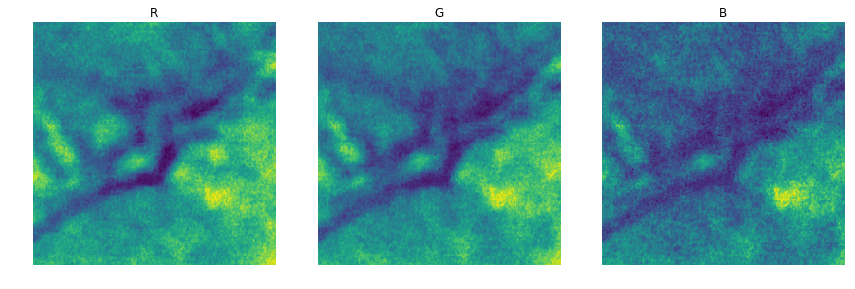

In [3]:
R = gambar[:,:,0]
G = gambar[:,:,1]
B = gambar[:,:,2]


fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 8))

ax0.imshow(R)
ax0.set_title("R")
ax0.axis('off')
ax1.imshow(G)
ax1.set_title("G")
ax1.axis('off')
ax2.imshow(B)
ax2.set_title("B")
ax2.axis('off')

fig.tight_layout()

# Feature RGB

In [6]:
print("R\t: ",np.mean(R))
print("G\t: ",np.mean(G))
print("B\t: ",np.mean(B))

R	:  44.36444091796875
G	:  40.116302490234375
B	:  29.702377319335938


# Konversi RGB to HSV

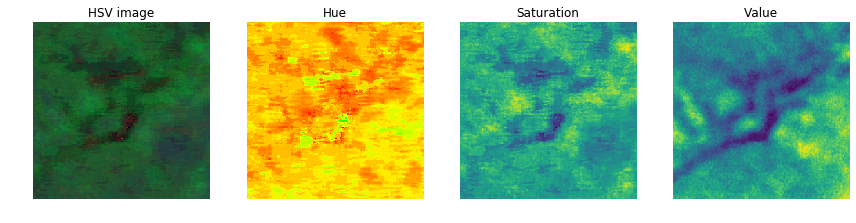

In [2]:
from skimage.color import rgb2hsv

hsv = rgb2hsv(gambar)
H = hsv[:, :, 0]
S = hsv[:,:,1]
V = hsv[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(12, 8))

ax0.imshow(hsv)
ax0.set_title("HSV image")
ax0.axis('off')
ax1.imshow(H, cmap='hsv')
ax1.set_title("Hue")
ax1.axis('off')
ax2.imshow(S)
ax2.set_title("Saturation")
ax2.axis('off')
ax3.imshow(V)
ax3.set_title("Value")
ax3.axis('off')

fig.tight_layout()

# Feature HSV

In [5]:
print("H\t: ",np.mean(H))
print("S\t: ",np.mean(S))
print("V\t: ",np.mean(V))

H	:  0.11948693542546718
S	:  0.3283439776215234
V	:  0.17425112256816788


# Konversi RGB to HSI

In [43]:
def rgb2hsi(gambar):
#     out = np.empty_like(gambar)
    gambar = np.float32(gambar)
    out = np.empty_like(gambar)

    
    R = gambar[:,:,0]
    G = gambar[:,:,1]
    B = gambar[:,:,2]
    
    H = np.empty_like(R)
    S = np.empty_like(R)
    I = np.empty_like(R)
    
    M = np.maximum(R,G,B)
    m = np.minimum(R,G,B)
    
    C = M - m
    
    I = 1 / 3 * (R + G + B)
    
    if C.all() == 0:
        H = 0
        S = 0
    else:
        if M == R:
            H = 60 * ( np.mod(((G-B)/C),6) )
        elif M == G:
            H = 60 * ( ((B-R)/C) + 2)
        elif M == B:
            H = 60 * ( ((R-G)/C) + 4)
        
        S = 1 - (m / i)
    out[:,:,0] = H
    out[:,:,1] = S
    out[:,:,2] = I
    return out     

In [30]:
from math import sqrt,pow,pi,acos

def rgb2hsi(gambar):
    
    gambar = np.float32(gambar)
    out = np.empty_like(gambar)
    
    R = gambar[:,:,0]
    G = gambar[:,:,1]
    B = gambar[:,:,2]
    
    
    def theta(R, G, B):
        atas = ((R-G)+(R-B))/2    
        bawah = sqrt(pow((R-G),2) + ((R-B) * (G-B)))
        
        return acos(atas / bawah)
    
    def get_hue(R, G, B):
        ''' Fungsi Untuk Mendapatkan Nilai Hue '''
        R = R/360
        G = G/360
        B = B/360
        #mendapatkan contoh ukuran matrix
        H = R
        
        for b in range(len(R)):
            for k in range(len(R)):
                H[b][k] = theta(R[b][k], G[b][k], B[b][k])
                
                #jika citra B lebih besar dari citra G
                if B[b][k] > G[b][k]:
                    H[b][k] = ((360 * pi) / 180.0) - theta(R[b][k], G[b][k], B[b][k])
        
        return H
    
    def get_saturation(R, G, B):
        ''' Fungsi Untuk Mendapatkan Nilai Saturation '''
        
        #mendapatkan nilai terkecil dari citra RGB
        minimum = np.minimum(np.minimum(R, G), B)
        
        S = 1 - ((3 * minimum) / (R + G + B))
        return S
    
    def get_intensity(R, G, B):
        ''' Fungsi Untuk Mendapatkan Nilai Intensity '''
        
        I = (R + G + B) / 3
        return I
    
    out[:,:,0] = get_hue(R,G,B)
    out[:,:,1] = get_saturation(R,G,B)
    out[:,:,2] = get_intensity(R,G,B)
    return out

# Feature HSI

In [44]:
hsi = rgb2hsi(gambar)

print("H\t: ",np.nanmean(hsi[:,:,0]))
print("S\t: ",np.mean(hsi[:,:,1]))
print("I\t: ",np.mean(hsi[:,:,2]))

H	:  0.0
S	:  0.0
I	:  41.509167
